# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

from config import weather_api_key
from config import g_key

from citipy import citipy

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [66]:
lat_lngz = []
cities = []

latz = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngz = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngz = zip(latz, lngz)

for lat_lng in lat_lngz:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    if city not in cities:
        cities.append(city)

print(len(cities))

638


In [67]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

record = 0
sets = 1

weather_df = pd.DataFrame({"City": cities})

weather_df["Country"] = ""
weather_df["Date"] = ""      
weather_df["Latitude"] = ""
weather_df["Longitude"] = ""
weather_df["Cloudiness (%)"] = ""
weather_df["Humidity (%)"] = ""
weather_df["Max Temp (F)"] = ""
weather_df["Wind Speed (mph)"] = ""


print("Beginning Data Retrieval")
print("-----------------------------")


for index, row in weather_df.iterrows():
    
    city = row["City"]
    
    query_url = base_url + "appid=" + weather_api_key + "&q=" + city
    weather_response = requests.get(query_url).json()
 
    try:
        print(f"Processing Record {record}  of Set {sets} | {city}.")
        
        weather_df.loc[index, "Country"] = weather_response["sys"]["country"]     
        weather_df.loc[index, "Date"] = datetime.datetime.fromtimestamp(weather_response["dt"])
        weather_df.loc[index, "Latitude"] = weather_response["coord"]["lat"]
        weather_df.loc[index, "Longitude"] = weather_response["coord"]["lon"]
        weather_df.loc[index, "Cloudiness (%)"] = weather_response["clouds"]["all"]
        weather_df.loc[index, "Humidity (%)"] = weather_response["main"]["humidity"]
        weather_df.loc[index, "Max Temp (F)"] = 1.8 * (weather_response["main"]["temp_max"] - 273) + 32
        weather_df.loc[index, "Wind Speed (mph)"] = weather_response["wind"]["speed"]
               
    except:
        print(f"City not found...skipping {city}.")
        #print (query_url) 
        
    
    record = record + 1
    if record == 50:
        record = 0
        sets = sets + 1 

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 0  of Set 1 | mahebourg.
Processing Record 1  of Set 1 | nicolas bravo.
Processing Record 2  of Set 1 | vaini.
Processing Record 3  of Set 1 | ushuaia.
Processing Record 4  of Set 1 | iacu.
Processing Record 5  of Set 1 | ribeira grande.
Processing Record 6  of Set 1 | bontang.
Processing Record 7  of Set 1 | atuona.
Processing Record 8  of Set 1 | puerto leguizamo.
Processing Record 9  of Set 1 | qaanaaq.
Processing Record 10  of Set 1 | hami.
Processing Record 11  of Set 1 | butaritari.
Processing Record 12  of Set 1 | katsuura.
Processing Record 13  of Set 1 | ravar.
Processing Record 14  of Set 1 | mataura.
Processing Record 15  of Set 1 | baoying.
Processing Record 16  of Set 1 | belushya guba.
City not found...skipping belushya guba.
Processing Record 17  of Set 1 | barentsburg.
City not found...skipping barentsburg.
Processing Record 18  of Set 1 | boa vista.
Processing Record 19  of Set 1 | gundlupet.
Proc

Processing Record 23  of Set 4 | chapais.
Processing Record 24  of Set 4 | kahului.
Processing Record 25  of Set 4 | horasan.
Processing Record 26  of Set 4 | yellowknife.
Processing Record 27  of Set 4 | houma.
Processing Record 28  of Set 4 | shaoguan.
Processing Record 29  of Set 4 | paamiut.
Processing Record 30  of Set 4 | tateyama.
Processing Record 31  of Set 4 | murovane.
Processing Record 32  of Set 4 | odda.
Processing Record 33  of Set 4 | vestmanna.
Processing Record 34  of Set 4 | saleaula.
City not found...skipping saleaula.
Processing Record 35  of Set 4 | setermoen.
Processing Record 36  of Set 4 | le vauclin.
Processing Record 37  of Set 4 | muli.
Processing Record 38  of Set 4 | dunedin.
Processing Record 39  of Set 4 | segou.
Processing Record 40  of Set 4 | olafsvik.
Processing Record 41  of Set 4 | pangody.
Processing Record 42  of Set 4 | belmonte.
Processing Record 43  of Set 4 | barrow.
Processing Record 44  of Set 4 | kavieng.
Processing Record 45  of Set 4 | a

Processing Record 2  of Set 8 | mopipi.
Processing Record 3  of Set 8 | north platte.
Processing Record 4  of Set 8 | nantucket.
Processing Record 5  of Set 8 | vytegra.
Processing Record 6  of Set 8 | fairbanks.
Processing Record 7  of Set 8 | marsh harbour.
Processing Record 8  of Set 8 | muhororo.
Processing Record 9  of Set 8 | atasu.
Processing Record 10  of Set 8 | klaksvik.
Processing Record 11  of Set 8 | ngorongoro.
Processing Record 12  of Set 8 | neryungri.
Processing Record 13  of Set 8 | shubarkuduk.
Processing Record 14  of Set 8 | balakhta.
Processing Record 15  of Set 8 | beloha.
Processing Record 16  of Set 8 | chokurdakh.
Processing Record 17  of Set 8 | marawi.
Processing Record 18  of Set 8 | sawtell.
Processing Record 19  of Set 8 | sioux lookout.
Processing Record 20  of Set 8 | tezu.
Processing Record 21  of Set 8 | seoul.
Processing Record 22  of Set 8 | kamenskoye.
City not found...skipping kamenskoye.
Processing Record 23  of Set 8 | sentyabrskiy.
City not fou

Processing Record 27  of Set 11 | suluq.
Processing Record 28  of Set 11 | aracuai.
Processing Record 29  of Set 11 | fianga.
City not found...skipping fianga.
Processing Record 30  of Set 11 | salina.
Processing Record 31  of Set 11 | changde.
Processing Record 32  of Set 11 | murdochville.
Processing Record 33  of Set 11 | tessalit.
Processing Record 34  of Set 11 | west bay.
Processing Record 35  of Set 11 | uige.
Processing Record 36  of Set 11 | jalu.
Processing Record 37  of Set 11 | yarada.
Processing Record 38  of Set 11 | kaoma.
Processing Record 39  of Set 11 | kutum.
Processing Record 40  of Set 11 | bako.
Processing Record 41  of Set 11 | lazaro cardenas.
Processing Record 42  of Set 11 | areka.
Processing Record 43  of Set 11 | tenabo.
Processing Record 44  of Set 11 | maldonado.
Processing Record 45  of Set 11 | hambantota.
Processing Record 46  of Set 11 | grootfontein.
Processing Record 47  of Set 11 | olovi.
Processing Record 48  of Set 11 | tandil.
Processing Record 4

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [48]:
weather_df.head()

,City,Country,Date,Latitude,Longitude,Cloudiness (%),Humidity (%),Max Temp (F),Wind Speed (mph)
0,cayenne,GF,2020-11-14 10:51:04,4.93,-52.33,100,66,86.27,3.1
1,sept-iles,CA,2020-11-14 10:47:15,50.2,-66.38,90,95,33.278,3.1
2,vaini,TO,2020-11-14 10:51:04,-21.2,-175.2,20,88,75.47,2.1
3,victoria,HK,2020-11-14 10:49:37,22.29,114.16,100,77,73.274,0.89
4,kruisfontein,ZA,2020-11-14 10:51:04,-34,24.73,26,60,70.268,3.13


In [65]:
pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float)
pd.to_numeric(weather_df["Humidity (%)"]).astype(float)
pd.to_numeric(weather_df["Latitude"]).astype(float)
pd.to_numeric(weather_df["Longitude"]).astype(float)
pd.to_numeric(weather_df["Max Temp (F)"]).astype(float)
pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float)
weather_df


weather_df.to_csv("/Users/williampappas/Desktop/API/Homework/Exports/weather_df.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

As we move away from the equator, temperature drops


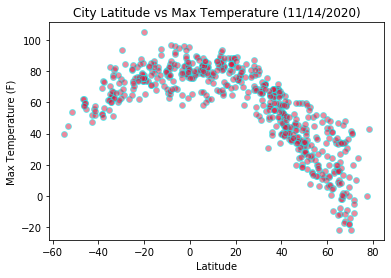

In [92]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Max Temp (F)"]).astype(float), facecolors="crimson", edgecolors="aqua", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs Max Temperature ({today})")
print("As we move away from the equator, temperature drops")
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/City Latitude vs. Max Temperature.png")

## Latitude vs. Humidity Plot

There is no relationship between latitude and humidity


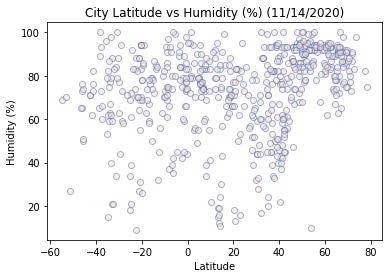

In [93]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Humidity (%)"]).astype(float), facecolors="moccasin", edgecolors="royalblue", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs Humidity (%) ({today})")
print("There is no relationship between latitude and humidity")
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/City Latitude vs. Humidity.png")

## Latitude vs. Cloudiness Plot

There is no relationship between latitude and cloudiness


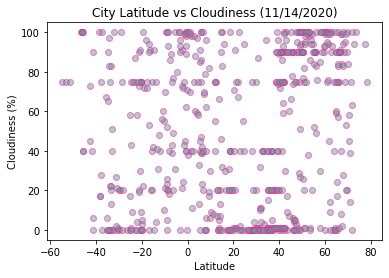

In [94]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Cloudiness (%)"]).astype(float), facecolors="cadetblue", edgecolors="deeppink", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs Cloudiness ({today})")
print("There is no relationship between latitude and cloudiness")
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/City Latitude vs. Cloudiness.png")

## Latitude vs. Wind Speed Plot

There is no relationship between latitude and windspeed


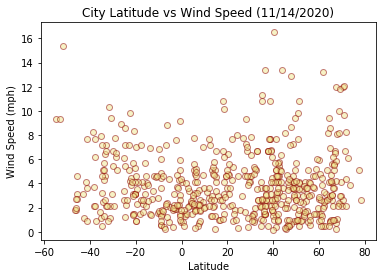

In [95]:
today = time.strftime("%m/%d/%Y")
plt.scatter(pd.to_numeric(weather_df["Latitude"]).astype(float), pd.to_numeric(weather_df["Wind Speed (mph)"]).astype(float), facecolors="khaki", edgecolors="darkred", alpha = 0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed ({today})")
print("There is no relationship between latitude and windspeed")
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/City Latitude vs. Windspeed.png")

## Linear Regression

In [54]:
northern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = -1.18x + 95.05
The r-squared is: -0.884073973631129
The regression displays a positive correlation.
In the northern hemisphere, as you get closer to the equator, the temperature increases.


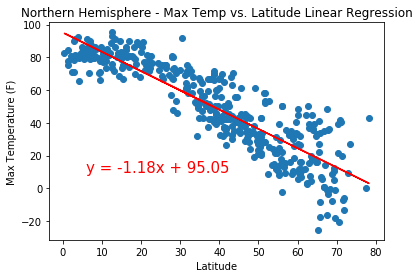

<Figure size 432x288 with 0 Axes>

In [96]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the northern hemisphere, as you get closer to the equator, the temperature increases.")
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/NorH Max Temp Linear.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y = 0.57x + 86.76
The r-squared is: 0.6193669604779073
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator, the temperature increases.


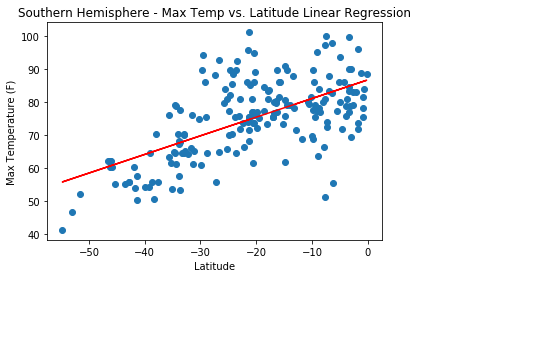

<Figure size 432x288 with 0 Axes>

In [97]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp (F)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator, the temperature increases.")
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/SoH Max Temp Linear.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.34x + 63.1
The r-squared is: 0.37897707937065606
The regression does not display a correlation between the data sets.


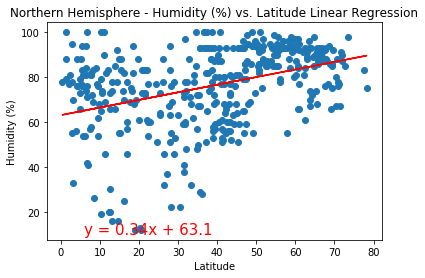

<Figure size 432x288 with 0 Axes>

In [98]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a correlation between the data sets.") 
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/NorH Max Humid Linear.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.17x + 71.44
The r-squared is: 0.10961666905331455
The regression does not display a correlation between the data sets.


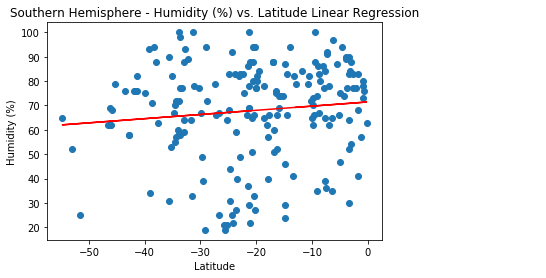

<Figure size 432x288 with 0 Axes>

In [99]:
Images/x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a correlation between the data sets.")
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/SoH Max Humid Linear.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.53x + 30.6
The r-squared is: 0.270882319703845
The regression does not display a correlation between the data sets.


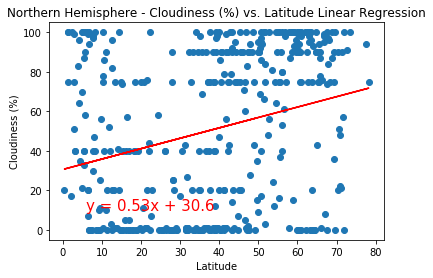

<Figure size 432x288 with 0 Axes>

In [100]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a correlation between the data sets.")
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/NorH Max Cloud Linear.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y = 0.08x + 55.36
The r-squared is: 0.029706032532265343
The regression does not display a correlation between the data sets.


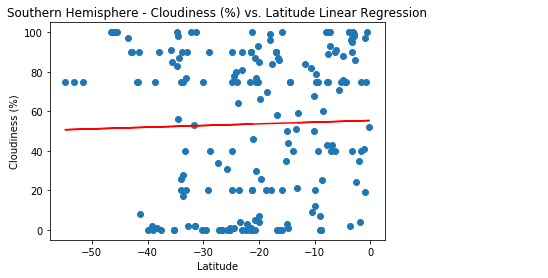

<Figure size 432x288 with 0 Axes>

In [101]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness (%)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a correlation between the data sets.")
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/SoH Max Cloud Linear.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = 0.01x + 3.02
The r-squared is: 0.1140264264933501
The regression does not display a correlation between the data sets.


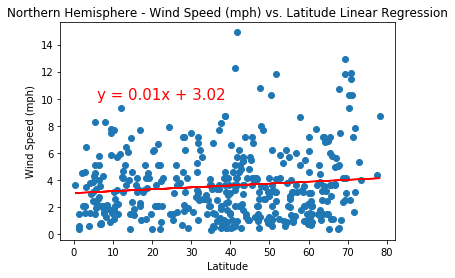

<Figure size 432x288 with 0 Axes>

In [102]:
x_values = pd.to_numeric(northern_df['Latitude']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a correlation between the data sets.")
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/NorH Max Wind Linear.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y = -0.05x + 2.81
The r-squared is: -0.26510338734075
The regression does not display a correlation between the data sets.


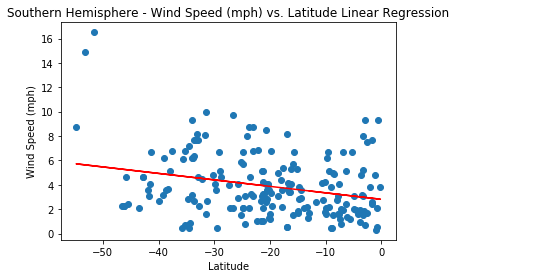

<Figure size 432x288 with 0 Axes>

In [103]:
x_values = pd.to_numeric(southern_df['Latitude']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed (mph)']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display a correlation between the data sets.")
plt.show()
plt.savefig("/Users/williampappas/Desktop/API/Homework/Images/SoH Max Wind Linear.png")